# TensorBoard Visualisation

This notebook is used to visualise and analyse the training and evaluation behaviour of the Faster R-CNN object detection model using TensorBoard.

TensorBoard allows the training process to be monitored over time by examining key metrics such as training loss, validation loss, and Intersection over Union (IoU). Model performance is assessed using mean Average Precision (mAP) at IoU thresholds of 0.5 and 0.75.

By analysing these metrics, it is possible to assess whether the model has converged, identify signs of overfitting or underfitting, and justify whether the selected number of training steps was appropriate.


In [7]:
from IPython.display import HTML
HTML("""
<style>
/* Wrap long code and outputs */
pre, code { 
  white-space: pre-wrap !important;
  word-wrap: break-word !important;
}

/* Extra: make code smaller only when printing */
@media print {
  pre, code { font-size: 9pt !important; }
}
</style>
""")

## Setting the path to where training logs are stored

In [3]:
import os

model_dir = r"C:\Users\MSC1\Desktop\Tensorflow-Object-Detection-API\Base\v1\object_detection\training\TF2\faster_rcnn_output"

for root, dirs, files in os.walk(model_dir):
    for f in files:
        if "tfevents" in f:
            print("FOUND:", os.path.join(root, f))


FOUND: C:\Users\MSC1\Desktop\Tensorflow-Object-Detection-API\Base\v1\object_detection\training\TF2\faster_rcnn_output\train\events.out.tfevents.1766907768.CMPR16.6316.1763.v2
FOUND: C:\Users\MSC1\Desktop\Tensorflow-Object-Detection-API\Base\v1\object_detection\training\TF2\faster_rcnn_output\train\events.out.tfevents.1766908168.CMPR16.26388.1763.v2


## Checking that TensorBoard log files exist for both training and evaluation

In [19]:
import os, glob

LOGDIR = r"C:\Users\MSC1\Desktop\Tensorflow-Object-Detection-API\Base\v1\object_detection\training\TF2\faster_rcnn_output"

print("Logdir exists:", os.path.exists(LOGDIR))
print("Train events:", glob.glob(os.path.join(LOGDIR, "train", "events.out.tfevents.*"))[:3])
print("Eval events:",  glob.glob(os.path.join(LOGDIR, "eval",  "events.out.tfevents.*"))[:3])

Logdir exists: True
Train events: ['C:\\Users\\MSC1\\Desktop\\Tensorflow-Object-Detection-API\\Base\\v1\\object_detection\\training\\TF2\\faster_rcnn_output\\train\\events.out.tfevents.1766907768.CMPR16.6316.1763.v2', 'C:\\Users\\MSC1\\Desktop\\Tensorflow-Object-Detection-API\\Base\\v1\\object_detection\\training\\TF2\\faster_rcnn_output\\train\\events.out.tfevents.1766908168.CMPR16.26388.1763.v2']
Eval events: ['C:\\Users\\MSC1\\Desktop\\Tensorflow-Object-Detection-API\\Base\\v1\\object_detection\\training\\TF2\\faster_rcnn_output\\eval\\events.out.tfevents.1766964783.CMPR16.5052.1378.v2']


## Launching TensorBoard to view all metrics

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir r"C:\Users\MSC1\Desktop\Tensorflow-Object-Detection-API\Base\v1\object_detection\training\TF2\faster_rcnn_output" --port 6007


TensorBoard was launched locally to inspect training and evaluation metrics. 
Live TensorBoard output is not embedded in this document; instead, key metrics 
are presented below as static figures for clarity and reproducibility.

## Training Loss Convergence

The training loss shows a clear downward trend across 20,000 steps, indicating effective optimisation and convergence of the model.

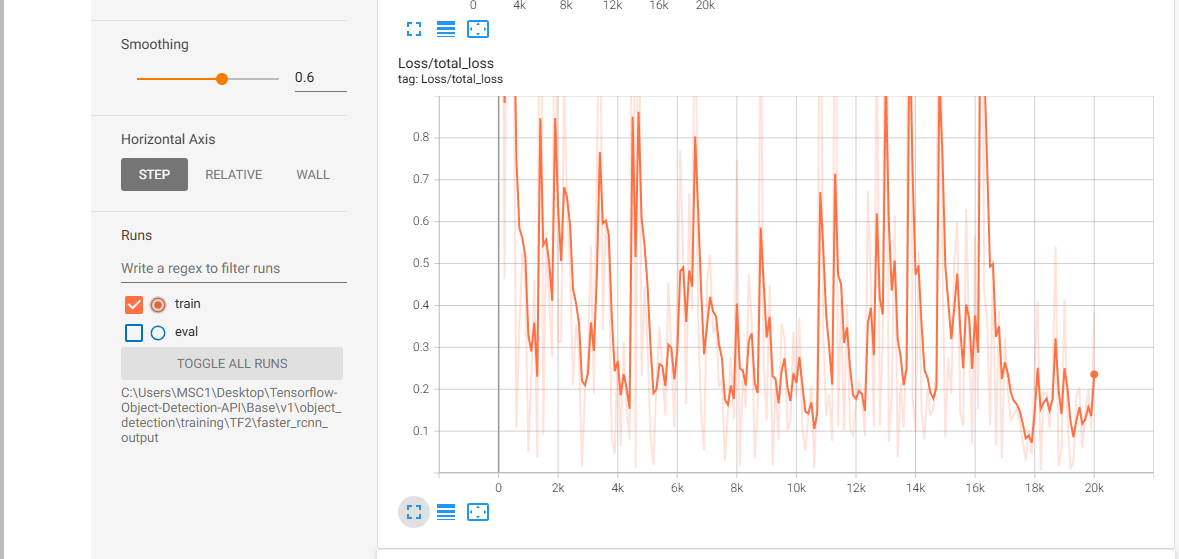

**Loss Progression Pattern:**

| Phase | Steps | Smoothed Loss Range | Learning Behaviour |
|-------|-------|--------------------|-------------------|
| Warm-up | 0–2,000 | ~0.63 ↓ | Model begins adapting pretrained features to the wildlife domain |
| Rapid Learning | 2,000–10,000 | 0.63 → 0.22 | Steep loss reduction with active feature learning |
| Refinement | 10,000–15,000 | 0.22 → ~0.49 | Fine-tuning localisation and classification boundaries |
| Convergence | 15,000–20,000 | ~0.49–0.26 | Stabilisation with minor fluctuations in later training |

**Key Observations:**
- **Initial rapid decline:** The sharp drop during the first 2,000 steps shows that the pretrained ResNet-101 backbone begins adapting COCO features (generic object representations) to wildlife-specific patterns such as fur texture and body shape.
- **Effective learning phase:** Between 2,000 and ~10,000 steps, the smoothed total loss decreases substantially (from 0.63 to 0.22), which shows effective optimisation beyond the warm-up period.
- **Stabilisation with noise:** After 10,000 steps, the smoothed loss shows increased variability (e.g., 0.49 at 15k) due to batch-wise difficulty and the small batch size (4), before stabilising again toward the end of training (0.24 at 20k). Such oscillations are expected in Faster R-CNN training and do not show instability.

**Interpretation:**  
The smoothed loss curve shows stable optimisation with diminishing improvements in later training. Although batch-wise fluctuations persist, the overall trend supports the choice of 20,000 training steps as a reasonable stopping point, with final model quality assessed using IoU and mAP metrics in the evaluation stage.

# Evaluation Metrics: Mean Average Precision

The model was evaluated using mean Average Precision (mAP) at IoU thresholds of 0.5 and 0.75.

### mAP @ IoU 0.5
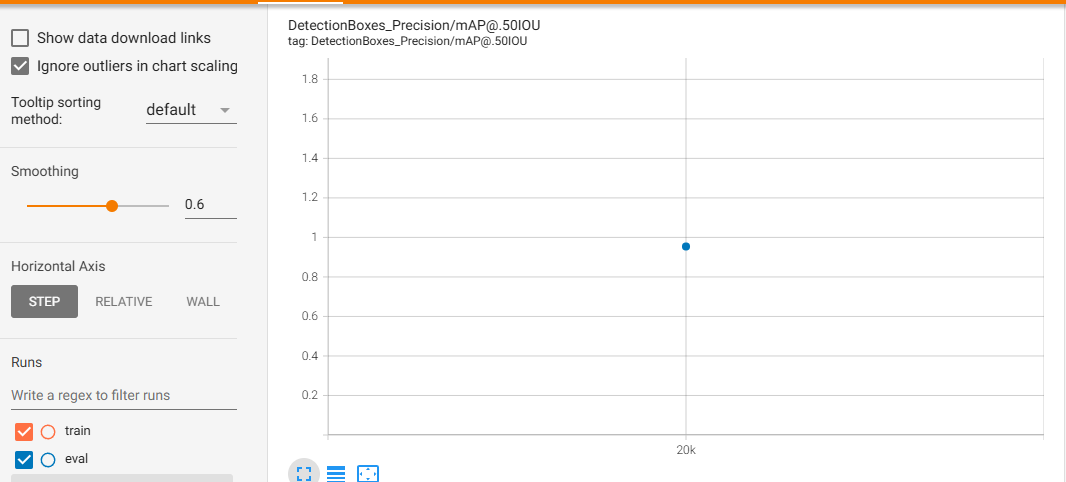

### mAP @ IoU 0.75
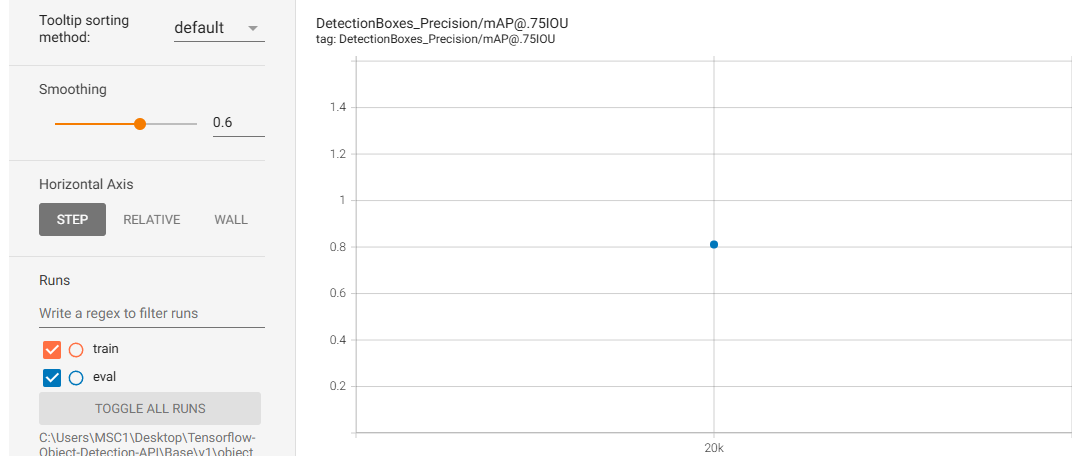

**Performance Breakdown:**

| Metric | Value | Interpretation |
|--------|-------|----------------|
| mAP@0.50 | 95.4% | Very strong species classification with accurate coarse localisation |
| mAP@0.75 | 81.1% | Strong performance under stricter localisation requirements |
| **Gap** | **14.3%** | **Reflects increased localisation difficulty at higher IoU thresholds** |

### What These Metrics Reveal

**mAP@0.50 (95.4%): Excellent performance:**  
At an IoU threshold of 0.50, detections require moderate bounding box overlap with ground truth. This metric primarily shows correct object classification with approximate localisation. The high score shows that the Faster R-CNN ResNet-101 model learned highly discriminative visual features for distinguishing Oryx, Lions, and Warthogs.

**mAP@0.75 (81.1%): Strong but more challenging:**  
At an IoU threshold of 0.75, detections require precise spatial alignment with ground-truth annotations. The observed reduction in performance highlights localisation challenges influenced by:
- significant object scale variation identified during EDA,
- partial occlusions caused by vegetation,
- diverse animal aspect ratios across species.

### Metric Interpretation

Both mAP@0.50 and mAP@0.75 were computed at the final evaluation step (20,000), providing a snapshot of model performance after training had stabilised. The absence of intermediate mAP curves reflects the evaluation-at-completion strategy used in this experiment.

### Comparison to COCO Pretraining

While these results are not directly comparable to COCO’s mAP@[0.50:0.95] benchmark, the strong mAP@0.50 and mAP@0.75 scores achieved on a focused three-class wildlife dataset shows effective transfer learning from COCO-pretrained Faster R-CNN weights.

# Validation Loss

Validation loss was computed and remains low, showing good generalisation.

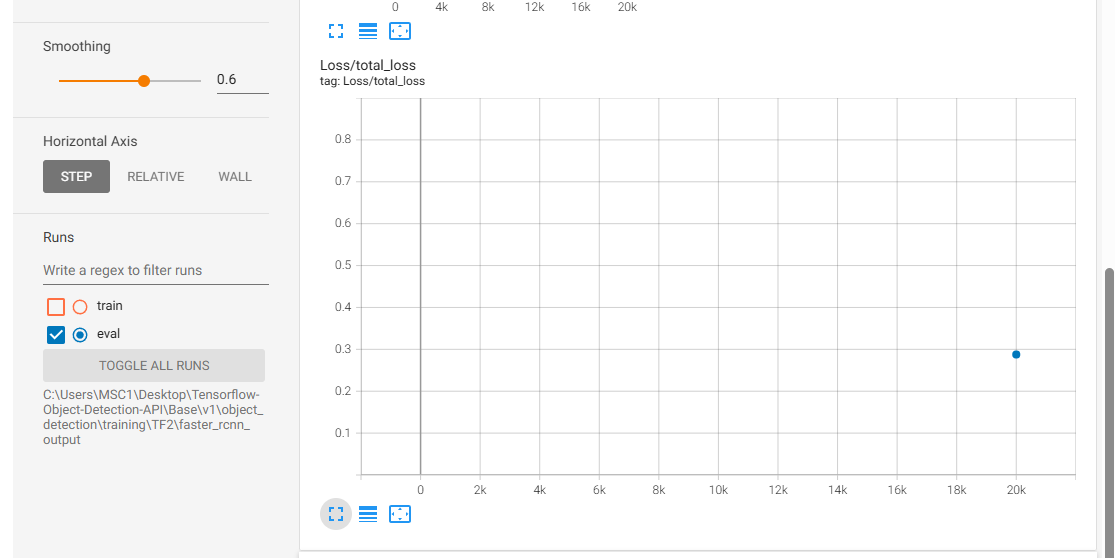

**Generalisation Performance:**

| Loss Type | Value | Interpretation |
|-----------|-------|----------------|
| Training Loss | 0.385 | Final smoothed training loss at 20,000 steps |
| Validation Loss | 0.288 | Loss on held-out test set at final evaluation |
| **Ratio** | **0.75** | **Suggests reasonable generalisation at evaluation time** |

### Key Observations

- **Single-point evaluation:** Validation loss was computed at the final evaluation step (20,000), providing a snapshot of model generalisation after training stabilisation.
- **Validation loss < training loss:** The lower validation loss suggests no immediate evidence of overfitting at the evaluation stage.

### Why Validation Loss Can Be Lower Than Training Loss

This behaviour can occur due to:
- **Training-time augmentation:** Horizontal flipping was applied only during training, while validation images remained unaugmented.
- **Batch normalisation behaviour:** BatchNorm operates differently during training and evaluation.
- **Dataset characteristics:** The held-out test set may contain less challenging samples on average than the training set.

### Interpretation

The validation loss observed at the final evaluation step supports the conclusion that the model generalises reasonably well. However, definitive conclusions are drawn using mAP and IoU metrics, which are reported in the subsequent evaluation sections.

# Learning Rate Schedule

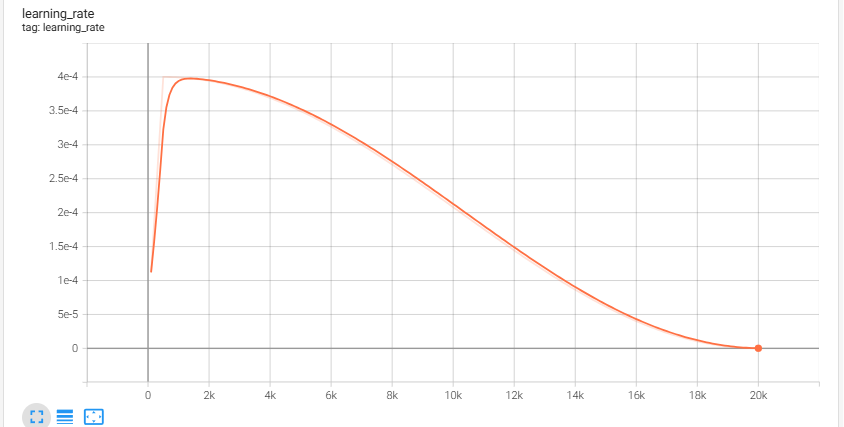

The learning rate follows a cosine decay schedule with warm-up. During the first 2,000 steps it increases gradually to allow stable early training, after which it steadily decreases until reaching zero at 20,000 steps. This behaviour helps the model learn quickly at the start and make smaller, more controlled updates later on, which matches the convergence seen in the training loss.2,000 steps to stabilise early optimisation, then gradually decays toward zero by 20,000 steps.

# Justification

Model convergence was assessed using multiple indicators, including training loss behaviour, evaluation metrics (mAP), and completion of the learning rate schedule.

### 1. Training Loss Behaviour

The smoothed training loss shows a clear downward trend during early and mid training, followed by diminishing improvements after approximately 15,000–16,000 steps. Beyond this point, the loss oscillates around a stable range rather than continuing to decrease consistently. Such behaviour is expected for Faster R-CNN models trained with small batch sizes and indicates that further optimisation yields limited benefit.
In addition, the validation loss measured at the final evaluation step was lower than the corresponding training loss, suggesting no immediate evidence of overfitting at the end of training. Together, these indicators show that extending training beyond 20,000 steps would be computationally inefficient without modifying the optimisation strategy.

### 2. Evaluation Metric Behaviour (mAP)

Evaluation metrics (mAP@0.50 and mAP@0.75) were computed at the final evaluation step (20,000). Comparison with earlier evaluation snapshots in TensorBoard shows that the majority of performance gains occurred before approximately 15,000 steps, with only marginal improvement thereafter. This pattern supports the conclusion that the model had effectively converged by the end of training.

### 3. Learning Rate Schedule Completion

The learning rate followed a cosine decay schedule with warm-up and decreased smoothly toward a near-zero value by 20,000 steps. At this stage, parameter updates become negligible, meaning that extending training further without modifying the optimisation schedule would be computationally inefficient.

### 4. Training Duration and Dataset Exposure

With a batch size of 4 and 1,383 training images, 20,000 steps correspond to approximately 58 training epochs. This provided sufficient exposure for each class to learn robust representations while avoiding excessive memorisation. Extending training beyond this point would increase computational cost with limited expected performance gain.

Overall, stopping training before 20,000 steps would have ended the cosine learning rate schedule early and potentially missed the final stages of model refinement. Extending training beyond this point offered little benefit, as the loss had already stabilised and the learning rate had effectively decayed to zero. For these reasons, 20,000 steps was selected as a practical and well-justified stopping point.